In [1]:
import os
os.chdir("E:\\DATA SCIENCE TERM-1\\Machine Learning-1\\ML 1 Assignment")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as stm

In [3]:
house_train = pd.read_csv("wk3_kc_house_train_data.csv")

In [4]:
house_train.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
5,9297300055,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
6,6865200140,20140529T000000,485000.0,4,1.00,1600,4300,1.5,0,0,...,7,1600,0,1916,0,98103,47.6648,-122.343,1610,4300
7,6300500875,20140514T000000,385000.0,4,1.75,1620,4980,1.0,0,0,...,7,860,760,1947,0,98133,47.7025,-122.341,1400,4980
8,7137970340,20140703T000000,285000.0,5,2.50,2270,6300,2.0,0,0,...,8,2270,0,1995,0,98092,47.3266,-122.169,2240,7005
9,8091400200,20140516T000000,252700.0,2,1.50,1070,9643,1.0,0,0,...,7,1070,0,1985,0,98030,47.3533,-122.166,1220,8386


In [5]:
house_train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


In [6]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
id               9761 non-null int64
date             9761 non-null object
price            9761 non-null float64
bedrooms         9761 non-null int64
bathrooms        9761 non-null float64
sqft_living      9761 non-null int64
sqft_lot         9761 non-null int64
floors           9761 non-null float64
waterfront       9761 non-null int64
view             9761 non-null int64
condition        9761 non-null int64
grade            9761 non-null int64
sqft_above       9761 non-null int64
sqft_basement    9761 non-null int64
yr_built         9761 non-null int64
yr_renovated     9761 non-null int64
zipcode          9761 non-null int64
lat              9761 non-null float64
long             9761 non-null float64
sqft_living15    9761 non-null int64
sqft_lot15       9761 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 1.6+ MB


In [7]:
house_train.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
house_train.shape

(9761, 21)

In [9]:
pd.DataFrame(house_train.corr()['price']).sort_values(by='price',ascending=False)

,price
price,1.000000
sqft_living,0.705052
grade,0.665567
sqft_above,0.611453
sqft_living15,0.584807
bathrooms,0.527532
view,0.399658
sqft_basement,0.322383
bedrooms,0.300808
lat,0.299280


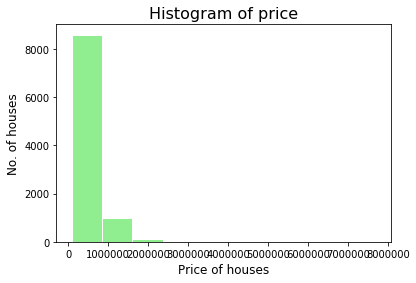

In [10]:
house_train.hist(column="price", 
          grid=False,         
          figsize = (6,4), bins=10,
          color = "lightgreen",
          edgecolor = "white")  

plt.xlabel("Price of houses", fontsize=12)
plt.ylabel("No. of houses", fontsize=12)
plt.title("Histogram of price", fontsize=16)


plt.show()

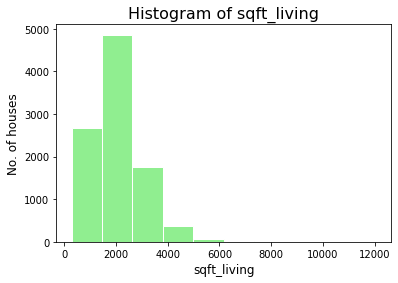

In [11]:
house_train.hist(column="sqft_living", 
          grid=False,         
          figsize = (6,4), bins=10,
          color = "lightgreen",
          edgecolor = "white")  

plt.xlabel("sqft_living", fontsize=12)
plt.ylabel("No. of houses", fontsize=12)
plt.title("Histogram of sqft_living", fontsize=16)


plt.show()

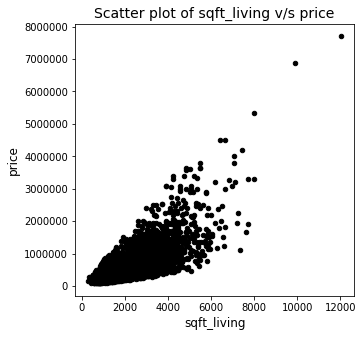

In [12]:
house_train.plot(kind="scatter",           
          x="sqft_living",y="price",       
          color="black",    
          figsize=(5,5))            


plt.xlabel("sqft_living", fontsize=12)
plt.ylabel("price", fontsize=12)
plt.title("Scatter plot of sqft_living v/s price", fontsize=14)

plt.show()

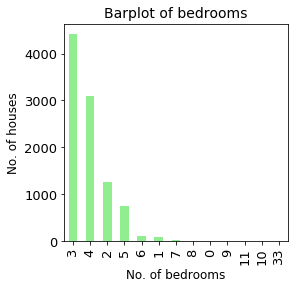

In [13]:
house_train['bedrooms'].value_counts().plot(kind='bar', figsize=(4,4),
                                        color="lightgreen", fontsize=13)

plt.xlabel("No. of bedrooms", fontsize=12)
plt.ylabel("No. of houses", fontsize=12)
plt.title("Barplot of bedrooms", fontsize=14)

plt.show()

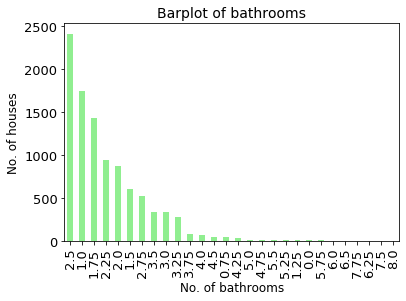

In [14]:
house_train['bathrooms'].value_counts().plot(kind='bar', figsize=(6,4),
                                        color="lightgreen", fontsize=13)

plt.xlabel("No. of bathrooms", fontsize=12)
plt.ylabel("No. of houses", fontsize=12)
plt.title("Barplot of bathrooms", fontsize=14)

plt.show()

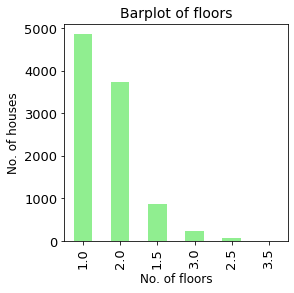

In [15]:
house_train['floors'].value_counts().plot(kind='bar', figsize=(4,4),
                                        color="lightgreen", fontsize=13)

plt.xlabel("No. of floors", fontsize=12)
plt.ylabel("No. of houses", fontsize=12)
plt.title("Barplot of floors", fontsize=14)

plt.show()

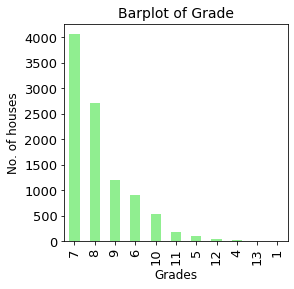

In [16]:
house_train['grade'].value_counts().plot(kind='bar', figsize=(4,4),
                                        color="lightgreen", fontsize=13)

plt.xlabel("Grades", fontsize=12)
plt.ylabel("No. of houses", fontsize=12)
plt.title("Barplot of Grade", fontsize=14)

plt.show()

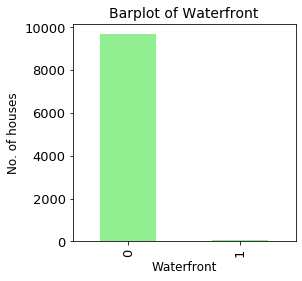

In [17]:
house_train['waterfront'].value_counts().plot(kind='bar', figsize=(4,4),
                                        color="lightgreen", fontsize=13)

plt.xlabel("Waterfront", fontsize=12)
plt.ylabel("No. of houses", fontsize=12)
plt.title("Barplot of Waterfront", fontsize=14)

plt.show()

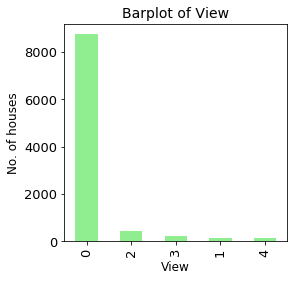

In [18]:
house_train['view'].value_counts().plot(kind='bar', figsize=(4,4),
                                        color="lightgreen", fontsize=13)

plt.xlabel("View", fontsize=12)
plt.ylabel("No. of houses", fontsize=12)
plt.title("Barplot of View", fontsize=14)

plt.show()

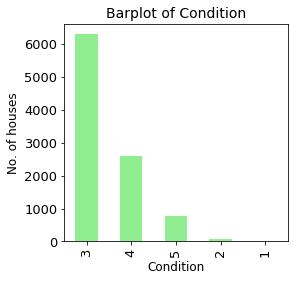

In [19]:
house_train['condition'].value_counts().plot(kind='bar', figsize=(4,4),
                                        color="lightgreen", fontsize=13)

plt.xlabel("Condition", fontsize=12)
plt.ylabel("No. of houses", fontsize=12)
plt.title("Barplot of Condition", fontsize=14)

plt.show()

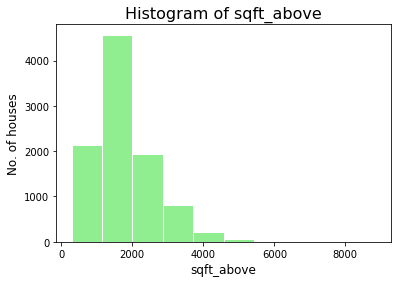

In [20]:
house_train.hist(column="sqft_above", 
          grid=False,         
          figsize = (6,4), bins=10,
          color = "lightgreen",
          edgecolor = "white")  

plt.xlabel("sqft_above", fontsize=12)
plt.ylabel("No. of houses", fontsize=12)
plt.title("Histogram of sqft_above", fontsize=16)


plt.show()

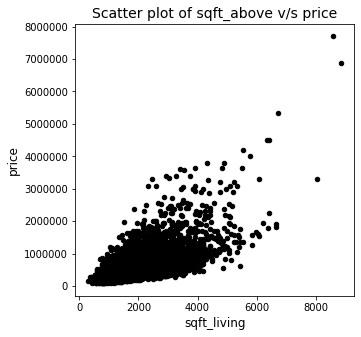

In [21]:
house_train.plot(kind="scatter",           
          x="sqft_above",y="price",       
          color="black",    
          figsize=(5,5))            


plt.xlabel("sqft_living", fontsize=12)
plt.ylabel("price", fontsize=12)
plt.title("Scatter plot of sqft_above v/s price", fontsize=14)

plt.show()

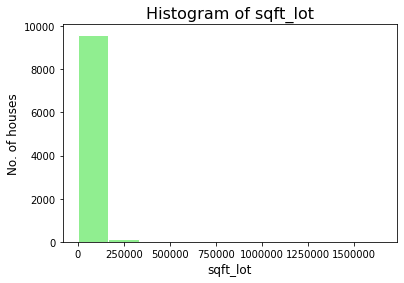

In [22]:
house_train.hist(column="sqft_lot", 
          grid=False,         
          figsize = (6,4), bins=10,
          color = "lightgreen",
          edgecolor = "white")  

plt.xlabel("sqft_lot", fontsize=12)
plt.ylabel("No. of houses", fontsize=12)
plt.title("Histogram of sqft_lot", fontsize=16)


plt.show()

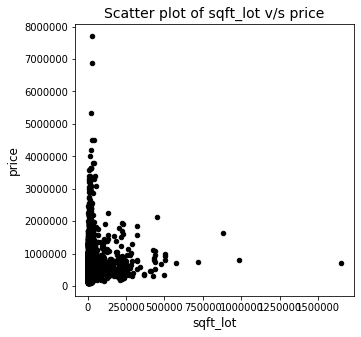

In [23]:
house_train.plot(kind="scatter",           
          x="sqft_lot",y="price",       
          color="black",    
          figsize=(5,5))            


plt.xlabel("sqft_lot", fontsize=12)
plt.ylabel("price", fontsize=12)
plt.title("Scatter plot of sqft_lot v/s price", fontsize=14)

plt.show()

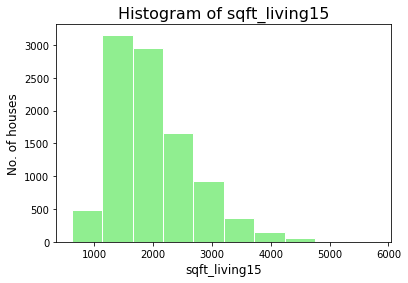

In [24]:
house_train.hist(column="sqft_living15", 
          grid=False,         
          figsize = (6,4), bins=10,
          color = "lightgreen",
          edgecolor = "white")  

plt.xlabel("sqft_living15", fontsize=12)
plt.ylabel("No. of houses", fontsize=12)
plt.title("Histogram of sqft_living15", fontsize=16)


plt.show()

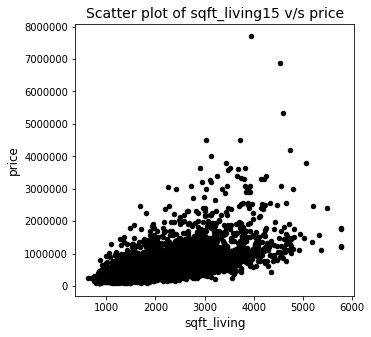

In [25]:
house_train.plot(kind="scatter",           
          x="sqft_living15",y="price",       
          color="black",    
          figsize=(5,5))            


plt.xlabel("sqft_living", fontsize=12)
plt.ylabel("price", fontsize=12)
plt.title("Scatter plot of sqft_living15 v/s price", fontsize=14)

plt.show()

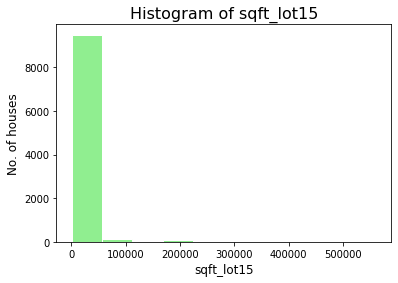

In [26]:
house_train.hist(column="sqft_lot15", 
          grid=False,         
          figsize = (6,4), bins=10,
          color = "lightgreen",
          edgecolor = "white")  

plt.xlabel("sqft_lot15", fontsize=12)
plt.ylabel("No. of houses", fontsize=12)
plt.title("Histogram of sqft_lot15", fontsize=16)


plt.show()

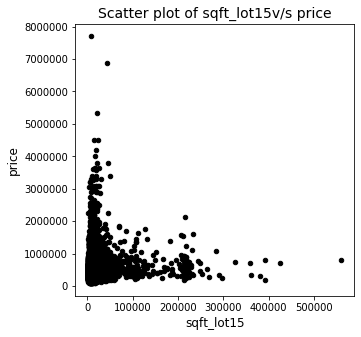

In [27]:
house_train.plot(kind="scatter",           
          x="sqft_lot15",y="price",       
          color="black",    
          figsize=(5,5))            


plt.xlabel("sqft_lot15", fontsize=12)
plt.ylabel("price", fontsize=12)
plt.title("Scatter plot of sqft_lot15v/s price", fontsize=14)

plt.show()

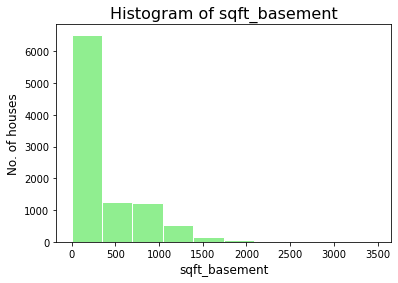

In [28]:
house_train.hist(column="sqft_basement", 
          grid=False,         
          figsize = (6,4), bins=10,
          color = "lightgreen",
          edgecolor = "white")  

plt.xlabel("sqft_basement", fontsize=12)
plt.ylabel("No. of houses", fontsize=12)
plt.title("Histogram of sqft_basement", fontsize=16)


plt.show()

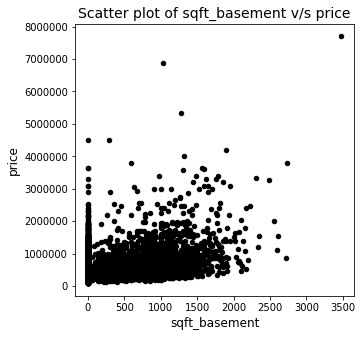

In [29]:
house_train.plot(kind="scatter",           
          x="sqft_basement",y="price",       
          color="black",    
          figsize=(5,5))            


plt.xlabel("sqft_basement", fontsize=12)
plt.ylabel("price", fontsize=12)
plt.title("Scatter plot of sqft_basement v/s price", fontsize=14)

plt.show()

## Model Building

## Model 1

In [30]:
house_train.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
5,9297300055,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
6,6865200140,20140529T000000,485000.0,4,1.00,1600,4300,1.5,0,0,...,7,1600,0,1916,0,98103,47.6648,-122.343,1610,4300
7,6300500875,20140514T000000,385000.0,4,1.75,1620,4980,1.0,0,0,...,7,860,760,1947,0,98133,47.7025,-122.341,1400,4980
8,7137970340,20140703T000000,285000.0,5,2.50,2270,6300,2.0,0,0,...,8,2270,0,1995,0,98092,47.3266,-122.169,2240,7005
9,8091400200,20140516T000000,252700.0,2,1.50,1070,9643,1.0,0,0,...,7,1070,0,1985,0,98030,47.3533,-122.166,1220,8386


In [31]:
unwanted = ['id','date','yr_built','yr_renovated','zipcode','lat','long']
house_train.drop(unwanted,axis=1,inplace=True)

In [32]:
X = house_train.drop(["price"], axis = 1)
y = house_train['price']

In [33]:
X.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000
1,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,4760,101930
2,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1330,6000
3,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1780,12697
4,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1370,10208
5,4,3.00,2950,5000,2.0,0,3,3,9,1980,970,2140,4000
6,4,1.00,1600,4300,1.5,0,0,4,7,1600,0,1610,4300
7,4,1.75,1620,4980,1.0,0,0,4,7,860,760,1400,4980
8,5,2.50,2270,6300,2.0,0,0,3,8,2270,0,2240,7005
9,2,1.50,1070,9643,1.0,0,0,3,7,1070,0,1220,8386


In [34]:
y.head(10)

0     604000.0
1    1225000.0
2     468000.0
3     310000.0
4     400000.0
5     650000.0
6     485000.0
7     385000.0
8     285000.0
9     252700.0
Name: price, dtype: float64

In [35]:
x = stm.add_constant(X)
x.head()

C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,1.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000
1,1.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,4760,101930
2,1.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1330,6000
3,1.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1780,12697
4,1.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1370,10208


In [36]:
mod1 = stm.OLS(y,x).fit()
mod1.params

const           -685626.776622
bedrooms         -33154.603379
bathrooms        -13647.316774
sqft_living         140.689138
sqft_lot              0.057535
floors            -7434.893104
waterfront       618998.671562
view              59504.281750
condition         53760.992094
grade             98851.972051
sqft_above           62.032973
sqft_basement        78.656163
sqft_living15         0.312393
sqft_lot15           -0.788248
dtype: float64

In [37]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     1264.
Date:                Mon, 25 May 2020   Prob (F-statistic):               0.00
Time:                        21:24:51   Log-Likelihood:            -1.3467e+05
No. Observations:                9761   AIC:                         2.694e+05
Df Residuals:                    9748   BIC:                         2.694e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.856e+05   2.65e+04    -25.871      0.000   -7.38e+05   -6.34e+05
bedrooms      -3.315e+04   3154.214    -10.511      0.000   -3.93e+04    -2.7e+04
bathrooms     -1.365e+04   5307.446     -2.571      0.010   -2.41e+04   -3243.623
sqft_living     140.6891      3.895     36.116      0.000     133.053     148.325
sqft_lot          0.0575      0.085      0.681      0.496      -0.108       0.223
floors        -7434.8931   6199.892     -1.199      0.230   -1.96e+04    4718.181
waterfront      6.19e+05   2.88e+04     21.474      0.000    5.62e+05    6.76e+05
view            5.95e+04   3594.256     16.555      0.000    5.25e+04    6.65e+04
condition      5.376e+04   3892.980     13.810      0.000    4.61e+04    6.14e+04
grade          9.885e+04   3616.261     27.335      0.000    9.18e+04    1.06e+05
sqft_above       62.0330      3.816     16.257      0.000      54.553      69.513
sqft_basement    78.6562      4.499     17.482      0.000      69.836      87.476
sqft_living15     0.3124      5.870      0.053      0.958     -11.194      11.819
sqft_lot15       -0.7882      0.132     -5.961      0.000      -1.047      -0.529
==============================================================================
Omnibus:                     7670.801   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           581113.911
Skew:                           3.205   Prob(JB):                         0.00
Kurtosis:                      40.252   Cond. No.                     3.01e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.71e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Validating Model 1

In [38]:
house_valid = pd.read_csv("wk3_kc_house_valid_data.csv")

In [39]:
house_valid.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
4,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
5,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
6,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
7,1736800520,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
8,1875500060,20140731T000000,395000.0,3,2.00,1890,14040,2.0,0,0,...,7,1890,0,1994,0,98019,47.7277,-121.962,1890,14018
9,7983200060,20150424T000000,230000.0,3,1.00,1250,9774,1.0,0,0,...,7,1250,0,1969,0,98003,47.3343,-122.306,1280,8850


In [40]:
house_valid.shape

(9635, 21)

In [41]:
house_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9635 entries, 0 to 9634
Data columns (total 21 columns):
id               9635 non-null int64
date             9635 non-null object
price            9635 non-null float64
bedrooms         9635 non-null int64
bathrooms        9635 non-null float64
sqft_living      9635 non-null int64
sqft_lot         9635 non-null int64
floors           9635 non-null float64
waterfront       9635 non-null int64
view             9635 non-null int64
condition        9635 non-null int64
grade            9635 non-null int64
sqft_above       9635 non-null int64
sqft_basement    9635 non-null int64
yr_built         9635 non-null int64
yr_renovated     9635 non-null int64
zipcode          9635 non-null int64
lat              9635 non-null float64
long             9635 non-null float64
sqft_living15    9635 non-null int64
sqft_lot15       9635 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 1.5+ MB


In [42]:
unwanted = ['id','date','yr_built','yr_renovated','zipcode','lat','long']
house_valid.drop(unwanted,axis=1,inplace=True)

In [43]:
X_valid = house_valid.drop(["price"], axis = 1)
y_valid = house_valid['price']

In [44]:
X_valid.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062
3,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503
4,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,2238,6819
5,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1650,9711
6,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1780,8113
7,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,2210,8925
8,3,2.00,1890,14040,2.0,0,0,3,7,1890,0,1890,14018
9,3,1.00,1250,9774,1.0,0,0,4,7,1250,0,1280,8850


In [45]:
y_valid.head(10)

0    221900.0
1    538000.0
2    180000.0
3    510000.0
4    257500.0
5    291850.0
6    229500.0
7    662500.0
8    395000.0
9    230000.0
Name: price, dtype: float64

In [46]:
x_valid = stm.add_constant(X_valid)
x_valid.head()

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,1.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650
1,1.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639
2,1.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062
3,1.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503
4,1.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,2238,6819


In [47]:
y_vpred = mod1.predict(x_valid)
y_vpred

0       282576.152608
1       545148.231439
2       132542.844420
3       467964.750627
4       365964.768394
            ...      
9630    234261.060094
9631    385239.867276
9632    420103.591670
9633    548384.304297
9634    441938.858279
Length: 9635, dtype: float64

In [48]:
type(y_valid)

pandas.core.series.Series

In [49]:
type(y_vpred)

pandas.core.series.Series

In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [51]:
rmse1 = sqrt(mean_squared_error(y_valid, y_vpred))
rmse1

223180.46368005752

In [52]:
rmse1 = np.sqrt(np.mean((np.array(y_valid)-np.array(y_vpred))**2)) #RMSE
rmse1

223180.46368005752